In [1]:
from importlib import reload
import numpy as np
pi=np.pi
#
import matplotlib.pyplot as plt
import matplotlib as mpl

from functools import partial
import copy

In [2]:
import phasr as phr

In [3]:
phr.__version__

'0.2.5.dev1+g28b07b4'

# Kinematik of the experiments

In [4]:
#Pb: 
q_Pb = np.sqrt(0.00616*1e6)
theta_Pb = 4.7*pi/180 #L: 4.71(2) R: 4.67(2)
print(q_Pb)
#Ca: 
q_Ca = np.sqrt(0.0297*1e6)
theta_Ca = 4.51*pi/180
print(q_Ca)
#Al:
q_Al = np.sqrt(0.02357*1e6)
theta_Al = 7.61*pi/180
print(q_Al)

78.48566748139433
172.33687939614086
153.52524222420234


In [5]:
#Pb:
#approx
print(q_Pb/(2*np.sin(theta_Pb/2)))
#approx
#Ca: 
#approx
print(q_Ca/(2*np.sin(theta_Ca/2)))
#Al:
#approx
print(q_Al/(2*np.sin(theta_Al/2)))

957.0550135868299
2189.961300796471
1156.7434233585843


# High partial waves Test

In [6]:
def weak_density_model(r,lam,nucleus): return (nucleus.Qw/nucleus.Z)*lam**3*nucleus.charge_density(lam*r)

In [7]:
Pb208_test1 = phr.nucleus('Pb208_test_100',Z=82,A=208,c=6.4,z=0.54,w=0.32)
Pb208_test1.weak_density = partial(weak_density_model,lam=1.00,nucleus=Pb208_test1)
Pb208_test1.update_dependencies()
Pb208_test1.fill_gaps()
Pb208_test2 = phr.nucleus('Pb208_test_095',Z=82,A=208,c=6.4,z=0.54,w=0.32)
Pb208_test2.weak_density = partial(weak_density_model,lam=0.9502,nucleus=Pb208_test2)
Pb208_test2.update_dependencies()
Pb208_test2.fill_gaps()

data not found at ./tmp/nucleus_splines/electric_field_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/nucleus_splines/electric_field_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt
data not found at ./tmp/nucleus_splines/electric_potential_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/nucleus_splines/electric_potential_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt
data not found at ./tmp/nucleus_splines/form_factor_Pb208_test_100fermi3p_x=0.0-1000.0-1.0.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/nucleus_splines/form_factor_Pb208_test_100fermi3p_x=0.0-1000.0-1.0.txt
data not found at ./tmp/nucleus_splines/electric_field_Pb208_test_095fermi3p_x=0.0-20.0-0.02.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/nucleus_splines/electric_field_Pb208_test_095fermi3p_x=0.0-20.0-0.02.txt
data not found at ./tmp/nucleus_splines/

In [8]:
beginning_radius_fm,electric_potential_V0,energy,mass,Z = 0.0121, -0.1291961769648503, 3000, 0, 82
#for kappa in range(-1,-200,-1):
kappa=-115
y0 = phr.dirac_solvers.base.initial_values_fm_norm(beginning_radius_fm,electric_potential_V0,energy,mass,kappa,Z)
y0

array([ 1.24513523e-197, -1.00000000e-200])

In [9]:
kappa=-100
E_MeV=3000
partial_wave_kappa = phr.continuumstates(Pb208_test1,kappa,E_MeV,lepton_mass=0,verbose=True,**{'method': 'DOP853', 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 1.3269804})
partial_wave_kappa.extract_phase_shift()
print(partial_wave_kappa.phase_difference)
partial_wave_kappa.solve_IVP()

r0= 0.0121 fm
rc= 12.6 fm
y0= [ 1.08342914e-47 -1.00000000e-50]
g_c (unnormalized) = 1.7911160756412234e+63
f_c (unnormalized) = 2.226633541746321e+63
A/B= 1.537015015323525
-0.004539643932004456
y0= [ 1.08342914e-47 -1.00000000e-50]
g_c (unnormalized) = 1.7911160756450614e+163
f_c (unnormalized) = 2.226633541751155e+163
A/B= 1.537015015319158
 A = 1.6267764440494817e+163
 B = 1.0583998385413853e+163
norm 2.6851337555075e+163


(0.0, 15.0)

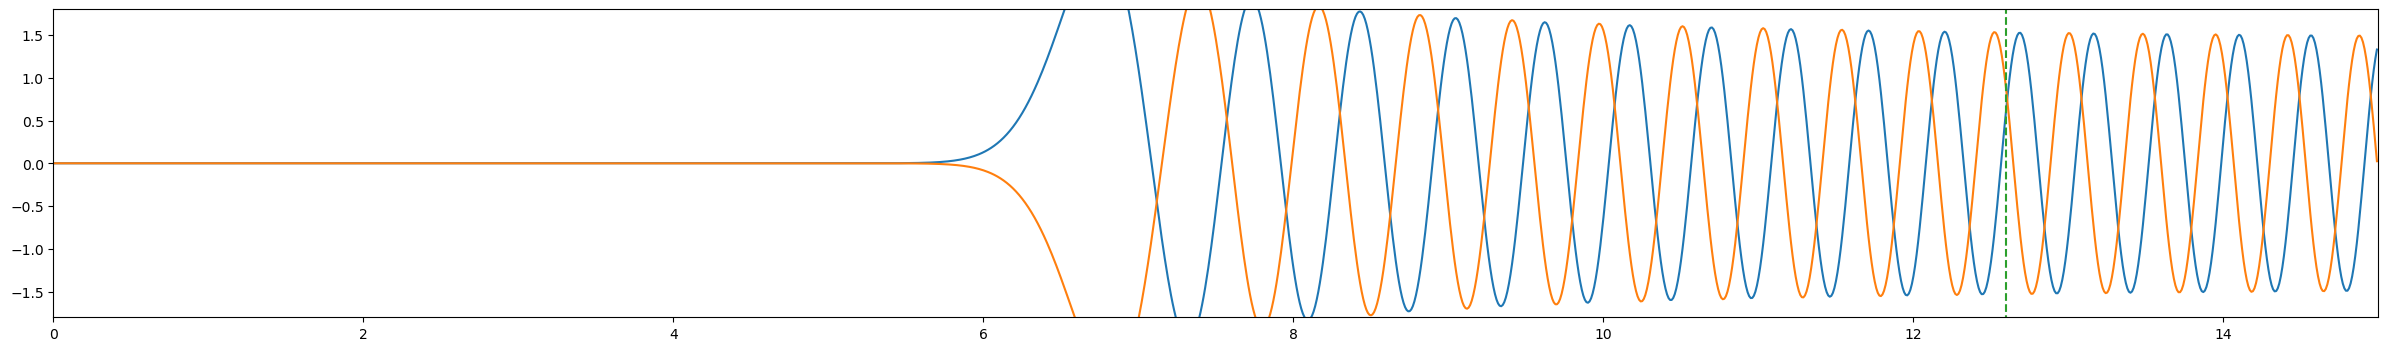

In [10]:
r=np.arange(0,15,1e-2)
plt.figure(figsize=(2*15,2*2))
plt.plot(r,partial_wave_kappa.wavefct_g(r))
plt.plot(r,partial_wave_kappa.wavefct_f(r))
plt.plot([12.6,12.6],[-2,+2],linestyle='--')
plt.ylim(-1.8,1.8)
plt.xlim(0,15)

In [11]:
kappa=-200
E_MeV=3000
partial_wave_kappa = phr.continuumstates(Pb208_test1,kappa,E_MeV,lepton_mass=0,verbose=True,**{'method': 'DOP853', 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 1.973269804})
partial_wave_kappa.extract_phase_shift()
partial_wave_kappa.phase_difference

r0= 0.0121 fm
rc= 12.6 fm
y0= [ 2.16146944e-47 -1.00000000e-50]
g_c (unnormalized) = 2.1598647455903714e+91
f_c (unnormalized) = -1.5819068294346275e+91
A/B= 13859780.548300426


-4.1548409157599053e-10

In [12]:
kappa=-500
E_MeV=3000
partial_wave_kappa = phr.continuumstates(Pb208_test1,kappa,E_MeV,lepton_mass=0,verbose=True,**{'method': 'DOP853', 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 1.973269804})
partial_wave_kappa.extract_phase_shift()
partial_wave_kappa.phase_difference

r0= 0.0121 fm
rc= 12.6 fm
y0= [ 5.39558927e-47 -1.00000000e-50]
g_c (unnormalized) = 1.7090588177004935e+45
f_c (unnormalized) = -3.4112588996743292e+44
A/B= 7.751731903627556e+305


0.0

# Horowitz

In [13]:
def weak_density_model(r,lam,nucleus): return (nucleus.Qw/nucleus.Z)*lam**3*nucleus.charge_density(lam*r)

## Pb208

In [14]:
Pb208_test1 = phr.nucleus('Pb208_test_100',Z=82,A=208,c=6.4,z=0.54,w=0.32)
Pb208_test1.weak_density = partial(weak_density_model,lam=1.00,nucleus=Pb208_test1)
Pb208_test1.update_dependencies()
Pb208_test1.fill_gaps()
Pb208_test2 = phr.nucleus('Pb208_test_095',Z=82,A=208,c=6.4,z=0.54,w=0.32)
Pb208_test2.weak_density = partial(weak_density_model,lam=0.9502,nucleus=Pb208_test2)
Pb208_test2.update_dependencies()
Pb208_test2.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Pb208_test_100fermi3p_x=0.0-1000.0-1.0.txt
data loaded from  ./tmp/nucleus_splines/electric_field_Pb208_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Pb208_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Pb208_test_095fermi3p_x=0.0-1000.0-1.0.txt


### TestPlots

In [15]:
Pb208_c=phr.nucleus('Phb208_c',A=208,Z=82)

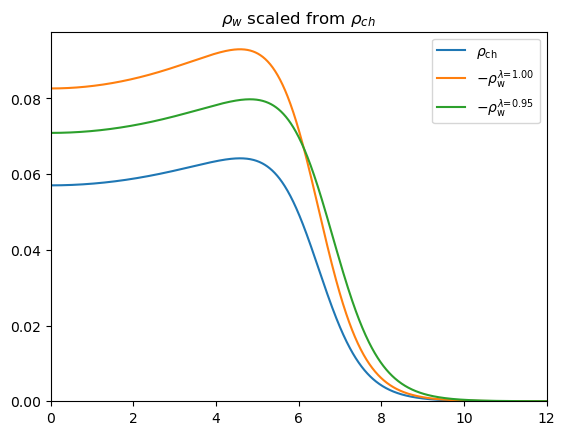

In [16]:
r=np.arange(0,12,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,Pb208_test1.charge_density(r),label=r'$\rho_\operatorname{ch}$')
plt.plot(r,-Pb208_test1.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=1.00}$')
plt.plot(r,-Pb208_test2.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=0.95}$')
plt.xlim(0,12)
plt.ylim(0,)
plt.legend()

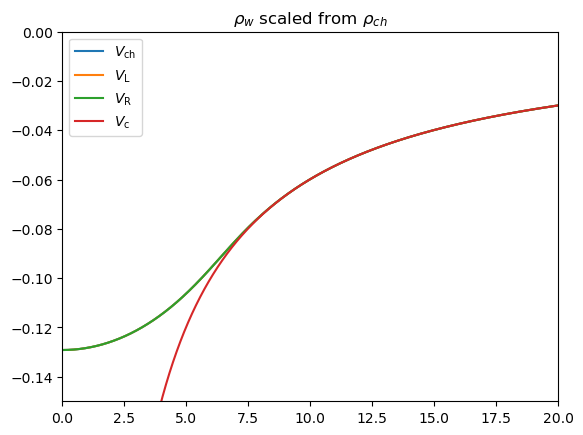

In [17]:
r=np.arange(0,20,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,Pb208_test1.electric_potential(r),label=r'$V_\operatorname{ch}$')
plt.plot(r,Pb208_test1.electric_potential(r)-Pb208_test1.weak_potential(r),label=r'$V_\operatorname{L}$')
plt.plot(r,Pb208_test1.electric_potential(r)+Pb208_test1.weak_potential(r),label=r'$V_\operatorname{R}$')
plt.plot(r[r>0],Pb208_c.electric_potential(r[r>0]),label=r'$V_\operatorname{c}$')
plt.xlim(0,20)
plt.ylim(-0.15,0)
plt.legend()

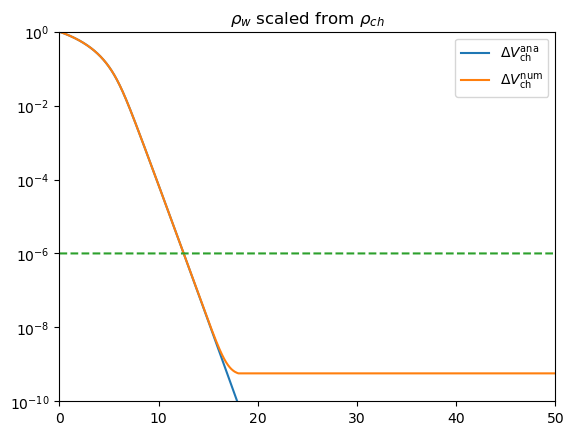

In [18]:
r=np.arange(1e-2,50,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,np.abs((Pb208_test1.electric_potential_ana(r)-Pb208_c.electric_potential(r))/Pb208_c.electric_potential(r)),label=r'$\Delta V^\operatorname{ana}_\operatorname{ch}$')
plt.plot(r,np.abs((Pb208_test1.electric_potential(r)-Pb208_c.electric_potential(r))/Pb208_c.electric_potential(r)),label=r'$\Delta V^\operatorname{num}_\operatorname{ch}$')
plt.plot(r,r*0+1e-6,linestyle='--')
plt.xlim(0,50)
plt.ylim(1e-10,1)
plt.yscale('log')
plt.legend()

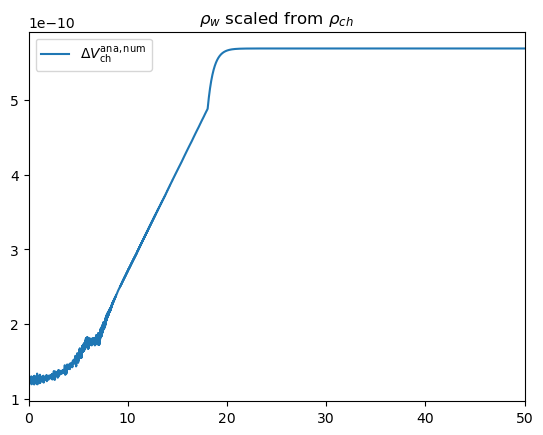

In [19]:
r=np.arange(1e-2,50,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,(Pb208_test1.electric_potential_ana(r)-Pb208_test1.electric_potential(r))/Pb208_test1.electric_potential(r),label=r'$\Delta V^\operatorname{ana,num}_\operatorname{ch}$')
#plt.plot(r,r*0+1e-6,linestyle='--')
plt.xlim(0,50)
#plt.ylim(1e-10,1)
#plt.yscale('log')
plt.legend()

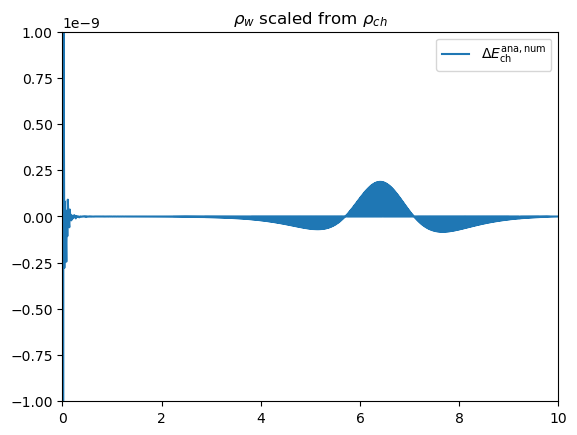

In [20]:
r=np.arange(1e-2,10,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,(Pb208_test1.electric_field_ana(r)-Pb208_test1.electric_field(r))/Pb208_test1.electric_field(r),label=r'$\Delta E^\operatorname{ana,num}_\operatorname{ch}$')
#plt.plot(r,r*0+1e-6,linestyle='--')
plt.xlim(0,10)
plt.ylim(-1e-9,1e-9)
#plt.yscale('log')
plt.legend()

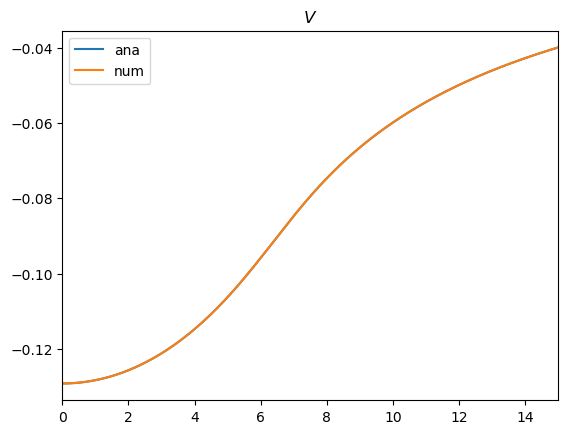

In [21]:
r=np.arange(0,15,1e-2)
plt.title(r'$V$')
plt.plot(r,Pb208_test1.electric_potential_ana(r),label=r'ana')
plt.plot(r,Pb208_test1.electric_potential(r),label=r'num')
plt.xlim(0,15)
#plt.ylim(-0.13,-0.12)
plt.legend()

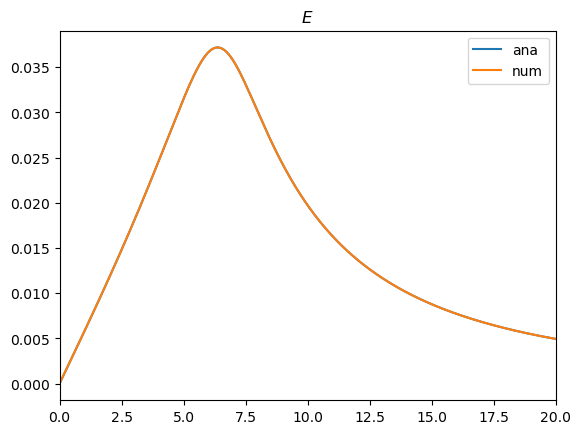

In [22]:
r=np.arange(1e-3,20,1e-2)
plt.title(r'$E$')
plt.plot(r,Pb208_test1.electric_field_ana(r),label=r'ana')
plt.plot(r,Pb208_test1.electric_field(r),label=r'num')
plt.xlim(0,20)
#plt.ylim(0,)
plt.legend()

In [23]:
print(Pb208_test1.Vmin)
print(Pb208_test1.Vmin_ana)

-0.1291961769648503
-0.1291961769809547


## He4

In [24]:
He4_test1 = phr.nucleus('He4_test_100',Z=2,A=4,c=1.008,z=0.327,w=0.445)
He4_test1.weak_density = partial(weak_density_model,lam=1.00,nucleus=He4_test1)
He4_test1.update_dependencies()
He4_test1.fill_gaps()
He4_test2 = phr.nucleus('He4_test_095',Z=2,A=4,c=1.008,z=0.327,w=0.445)
He4_test2.weak_density = partial(weak_density_model,lam=1./0.99,nucleus=He4_test2) # unclear what value for lambda
He4_test2.update_dependencies()
He4_test2.fill_gaps()

data not found at ./tmp/nucleus_splines/electric_field_He4_test_100fermi3p_x=0.0-20.0-0.02.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/nucleus_splines/electric_field_He4_test_100fermi3p_x=0.0-20.0-0.02.txt
data not found at ./tmp/nucleus_splines/electric_potential_He4_test_100fermi3p_x=0.0-20.0-0.02.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/nucleus_splines/electric_potential_He4_test_100fermi3p_x=0.0-20.0-0.02.txt
data not found at ./tmp/nucleus_splines/form_factor_He4_test_100fermi3p_x=0.0-1000.0-1.0.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/nucleus_splines/form_factor_He4_test_100fermi3p_x=0.0-1000.0-1.0.txt
data not found at ./tmp/nucleus_splines/electric_field_He4_test_095fermi3p_x=0.0-20.0-0.02.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/nucleus_splines/electric_field_He4_test_095fermi3p_x=0.0-20.0-0.02.txt
data not found at ./tmp/nucleus_splines/electric_potenti

### Test Plots

In [25]:
He4_c = phr.nucleus('He4_c',Z=2,A=4)

In [26]:
He4_test2.weak_radius/He4_test2.charge_radius

0.99

In [27]:
He4_test2.charge_radius

1.7168331457341202

In [28]:
He4_test2.weak_radius

1.699664814276779

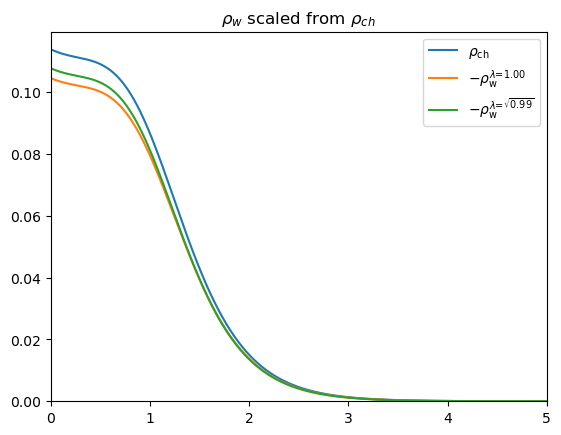

In [29]:
r=np.arange(0,5,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,He4_test1.charge_density(r),label=r'$\rho_\operatorname{ch}$')
plt.plot(r,-He4_test1.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=1.00}$')
plt.plot(r,-He4_test2.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=\sqrt{0.99}}$')
plt.xlim(0,5)
plt.ylim(0,)
plt.legend()

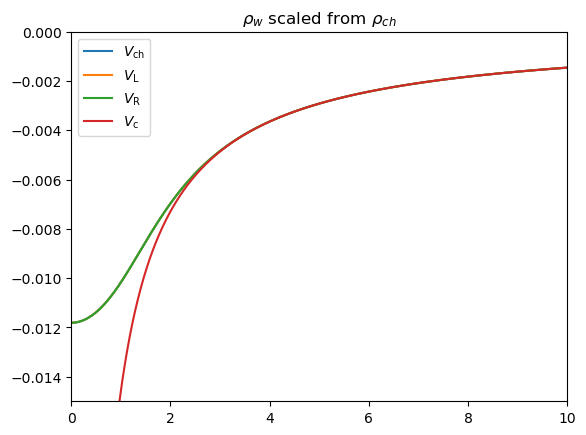

In [30]:
r=np.arange(0,10,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,He4_test1.electric_potential(r),label=r'$V_\operatorname{ch}$')
plt.plot(r,He4_test1.electric_potential(r)-He4_test1.weak_potential(r),label=r'$V_\operatorname{L}$')
plt.plot(r,He4_test1.electric_potential(r)+He4_test1.weak_potential(r),label=r'$V_\operatorname{R}$')
plt.plot(r[r>0],He4_c.electric_potential(r[r>0]),label=r'$V_\operatorname{c}$')
plt.xlim(0,10)
plt.ylim(-0.015,0)
plt.legend()

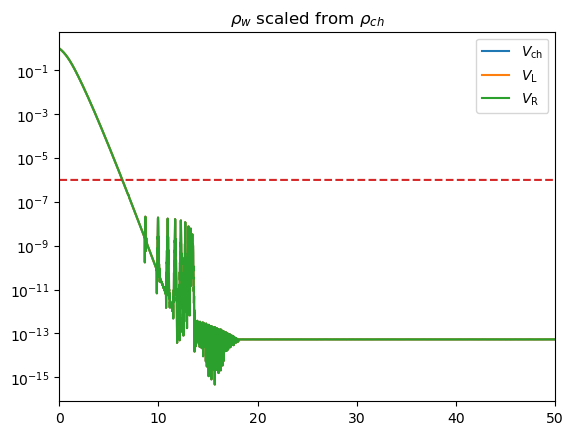

In [31]:
r=np.arange(1e-2,50,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,np.abs((He4_test1.electric_potential(r)-He4_c.electric_potential(r))/He4_c.electric_potential(r)),label=r'$V_\operatorname{ch}$')
plt.plot(r,np.abs((He4_test1.electric_potential(r)-He4_test1.weak_potential(r)-He4_c.electric_potential(r))/He4_c.electric_potential(r)),label=r'$V_\operatorname{L}$')
plt.plot(r,np.abs((He4_test1.electric_potential(r)+He4_test1.weak_potential(r)-He4_c.electric_potential(r))/He4_c.electric_potential(r)),label=r'$V_\operatorname{R}$')
plt.plot(r,r*0+1e-6,linestyle='--')
plt.xlim(0,50)
#plt.ylim(1e-12,1)
plt.yscale('log')
plt.legend()

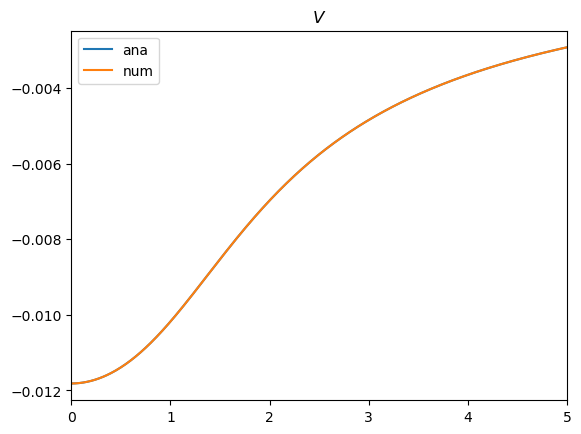

In [32]:
r=np.arange(0,5,1e-2)
plt.title(r'$V$')
plt.plot(r,He4_test1.electric_potential_ana(r),label=r'ana')
plt.plot(r,He4_test1.electric_potential(r),label=r'num')
plt.xlim(0,5)
#plt.ylim(-0.13,-0.12)
plt.legend()

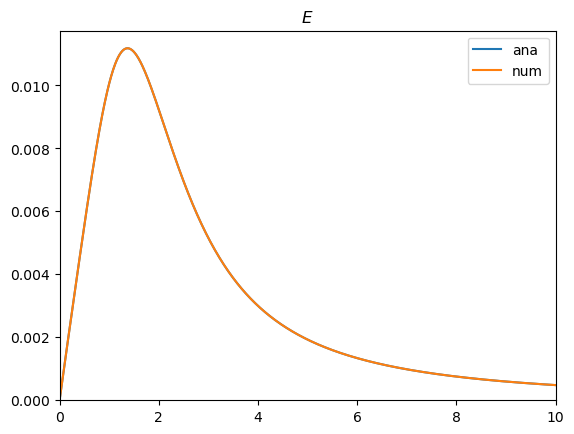

In [33]:
r=np.arange(1e-3,10,1e-2)
plt.title(r'$E$')
plt.plot(r,He4_test1.electric_field_ana(r),label=r'ana')
plt.plot(r,He4_test1.electric_field(r),label=r'num')
plt.xlim(0,10)
plt.ylim(0,)
plt.legend()

In [34]:
print(He4_test1.Vmin)
print(He4_test1.Vmin_ana)

-0.01181459414191814
-0.011814594146245952


# A_PV (compare Horowitz 1998)

## Pb208

### Optimise settings

In [81]:
Pb208_ref_test = phr.nuclei.references.load_reference_nucleus(82,208)[0]
Pb208_ref_test.weak_density = partial(weak_density_model,lam=1.00,nucleus=Pb208_ref_test)
Pb208_ref_test.update_dependencies()

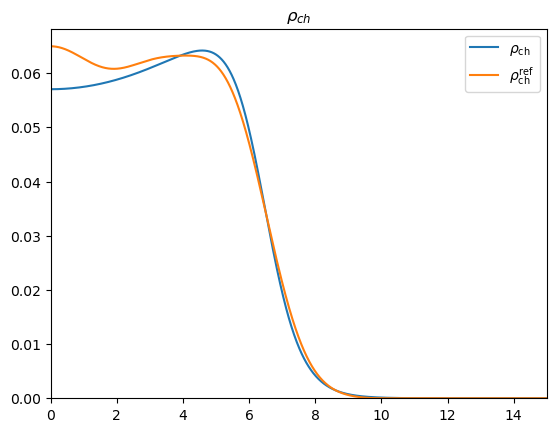

In [82]:
r=np.arange(0,15,1e-2)
plt.title(r'$\rho_{ch}$')
plt.plot(r,Pb208_test1.charge_density(r),label=r'$\rho_\operatorname{ch}$')
plt.plot(r,Pb208_ref_test.charge_density(r),label=r'$\rho^\operatorname{ref}_\operatorname{ch}$')
plt.xlim(0,15)
plt.ylim(0,)
plt.legend()

In [83]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
A_PV_ref_test = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_ref_test,verbose=True)

Calculate left crosssection ...
E= 846.2705639962488 MeV
r0= 0.0107 fm
rc= 11.3 fm
Calculate phaseshift for kappa= -1 , delta_diff=  1.0457583594308693
Calculate phaseshift for kappa= -2 , delta_diff=  -1.4129871261909064
Calculate phaseshift for kappa= -3 , delta_diff=  -1.1064016064271311
Calculate phaseshift for kappa= -4 , delta_diff=  -0.9077638959796959
Calculate phaseshift for kappa= -5 , delta_diff=  -0.7616639869275867
Calculate phaseshift for kappa= -6 , delta_diff=  -0.647012464185658
Calculate phaseshift for kappa= -7 , delta_diff=  -0.5534883914803288
Calculate phaseshift for kappa= -8 , delta_diff=  -0.4752579151033225
Calculate phaseshift for kappa= -9 , delta_diff=  -0.40869560319947595
Calculate phaseshift for kappa= -10 , delta_diff=  -0.35139057370232063
Calculate phaseshift for kappa= -11 , delta_diff=  -0.3016551695539169
Calculate phaseshift for kappa= -12 , delta_diff=  -0.2582587454188714
Calculate phaseshift for kappa= -13 , delta_diff=  -0.22027303444154533
Ca

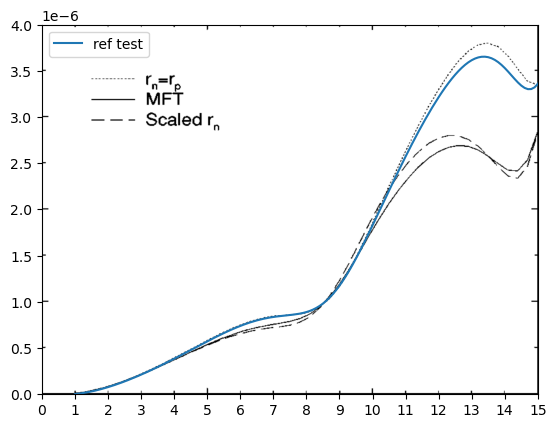

In [84]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15,0, 4e-6],aspect='auto')
#
plt.plot(theta_deg,A_PV_ref_test,label='ref test')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
plt.legend()

In [85]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
args_APV_Pb208=phr.dirac_solvers.post_processing.crosssection.optimise_left_right_asymmetry_precision(E_MeV,theta_deg*pi/180,Pb208_ref_test,left_right_asymmetry_precision=1e-2)

new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 46.71824908256531 diff: -0.0
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 44.44751453399658 diff: -0.0
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 41.494988679885864 diff: 4.912618125680807e-06
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 40.16367197036743 diff: 4.274397693647711e-05
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 37.35569500923157 diff: 1.0077165418725235e-05
new best: {'method': 'DOP853', 'N_partial_wa

In [86]:
args_APV_Pb208={'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-09}#{'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-09}

In [87]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
A_PV_ref_test_opt = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_ref_test,verbose=False,**args_APV_Pb208)

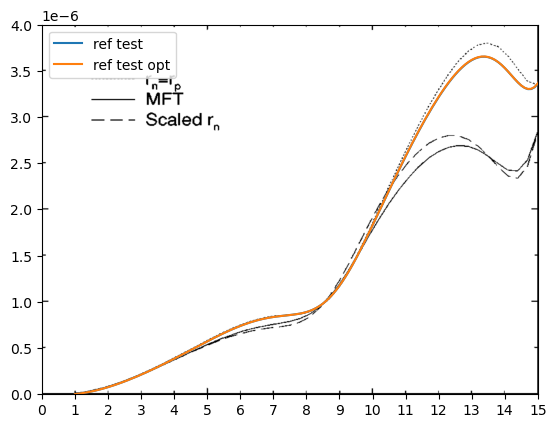

In [88]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15,0, 4e-6],aspect='auto')
#
plt.plot(theta_deg,A_PV_ref_test,label='ref test')
plt.plot(theta_deg,A_PV_ref_test_opt,label='ref test opt')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
plt.legend()

### Compare

In [89]:
args_APV_Pb208={'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-09}#{'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-09}

In [90]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
print('Start')
A_PV1 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_test1,verbose=True,**args_APV_Pb208)
print('APV1 done')
A_PV2 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_test2,verbose=True,**args_APV_Pb208)
print('APV2 done')

Start
Calculate left crosssection ...
E= 846.2705639962488 MeV
r0= 0.0115 fm
rc= 12.6 fm
Calculate phaseshift for kappa= -1 , delta_diff=  1.0459037054036313
Calculate phaseshift for kappa= -2 , delta_diff=  -1.4129033724530244
Calculate phaseshift for kappa= -3 , delta_diff=  -1.106295243497125
Calculate phaseshift for kappa= -4 , delta_diff=  -0.9076036243074457
Calculate phaseshift for kappa= -5 , delta_diff=  -0.7614301773398582
Calculate phaseshift for kappa= -6 , delta_diff=  -0.6466922637532679
Calculate phaseshift for kappa= -7 , delta_diff=  -0.5530739091010162
Calculate phaseshift for kappa= -8 , delta_diff=  -0.4747449399092458
Calculate phaseshift for kappa= -9 , delta_diff=  -0.40808250745486774
Calculate phaseshift for kappa= -10 , delta_diff=  -0.3506775136879057
Calculate phaseshift for kappa= -11 , delta_diff=  -0.3008436924511315
Calculate phaseshift for kappa= -12 , delta_diff=  -0.25735188557617406
Calculate phaseshift for kappa= -13 , delta_diff=  -0.21927581848043

(0.0, 4e-06)

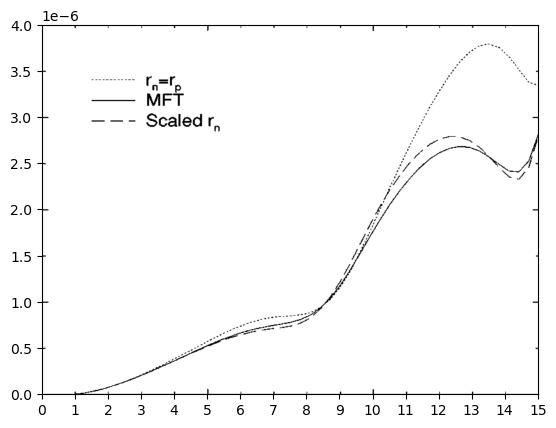

In [91]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15.04,-0.01e-6, 3.99e-6],aspect='auto')
#
#plt.plot(theta_deg,A_PV1,label='1.0000')
#plt.plot(theta_deg,A_PV2,label='0.9502')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
#plt.legend()

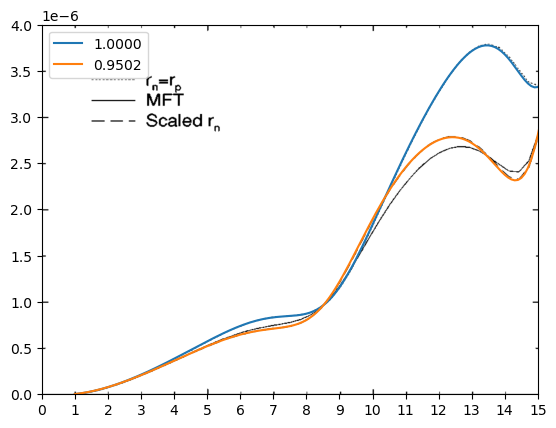

In [92]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15.04,-0.01e-6, 3.99e-6],aspect='auto')
#
plt.plot(theta_deg,A_PV1,label='1.0000')
plt.plot(theta_deg,A_PV2,label='0.9502')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
plt.legend()

(0.0, 5e-05)

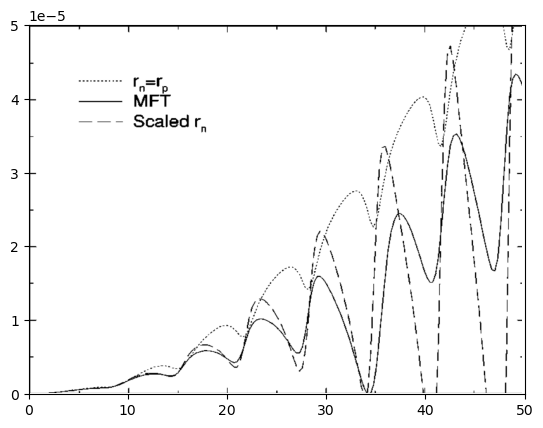

In [93]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref2.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0.1,49.6,0.02e-5, 4.98e-5],aspect='auto')
#
#
#plt.plot(theta_deg,A_PV1,label='1.0000')
#plt.plot(theta_deg,A_PV2,label='0.9502')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,50)
plt.ylim(0,5e-5)
#plt.legend()

(0.0, 5e-05)

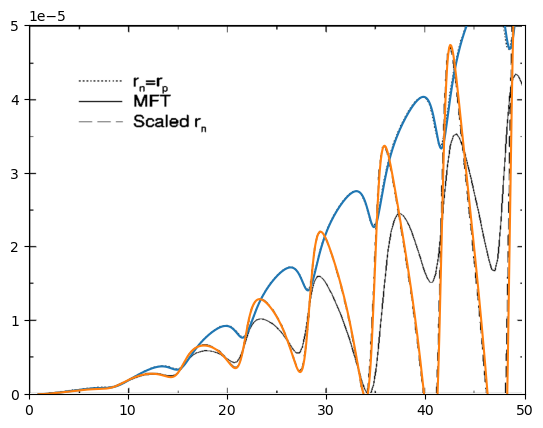

In [94]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref2.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0.1,49.6,0.02e-5, 4.98e-5],aspect='auto')
#
#
plt.plot(theta_deg,A_PV1,label='1.0000')
plt.plot(theta_deg,A_PV2,label='0.9502')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,50)
plt.ylim(0,5e-5)
#plt.legend()

In [95]:
theta_deg=np.arange(1,100,1e-1)
E1_MeV=502
E2_MeV=850
E3_MeV=3000
print('Start')
A_PV_502 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E1_MeV,theta_deg*pi/180,Pb208_test1,verbose=False,**args_APV_Pb208)
print('502 done')
A_PV_850 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E2_MeV,theta_deg*pi/180,Pb208_test1,verbose=False,**args_APV_Pb208)
print('850 done')
A_PV_3000 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E3_MeV,theta_deg*pi/180,Pb208_test1,verbose=True,**{'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0})
print('3000 done')
A_PV_3000_norecoil = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E3_MeV,theta_deg*pi/180,Pb208_test1,verbose=True,recoil=False,**{'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0})
print('3000 norecoil done')

Start
502 done
850 done
Calculate left crosssection ...
E= 2953.543357738739 MeV
r0= 0.0115 fm
rc= 12.6 fm
Calculate phaseshift for kappa= -1 , delta_diff=  0.2984158815353908
Calculate phaseshift for kappa= -2 , delta_diff=  0.9825329078222007
Calculate phaseshift for kappa= -3 , delta_diff=  1.2913584131138887
Calculate phaseshift for kappa= -4 , delta_diff=  1.4931507482508994
Calculate phaseshift for kappa= -5 , delta_diff=  -1.4982880828494745
Calculate phaseshift for kappa= -6 , delta_diff=  -1.3786949563138116
Calculate phaseshift for kappa= -7 , delta_diff=  -1.2793526004810292
Calculate phaseshift for kappa= -8 , delta_diff=  -1.1944382035544212
Calculate phaseshift for kappa= -9 , delta_diff=  -1.1203377180005192
Calculate phaseshift for kappa= -10 , delta_diff=  -1.054652426529695
Calculate phaseshift for kappa= -11 , delta_diff=  -0.9957081966823882
Calculate phaseshift for kappa= -12 , delta_diff=  -0.9422899799452145
Calculate phaseshift for kappa= -13 , delta_diff=  -0.8

In [96]:
q1_fm = 2*E1_MeV/phr.constants.hc*np.sin(theta_deg/2*pi/180)
q2_fm = 2*E2_MeV/phr.constants.hc*np.sin(theta_deg/2*pi/180)
q3_fm = 2*E3_MeV/phr.constants.hc*np.sin(theta_deg/2*pi/180)

(0.0, 3e-05)

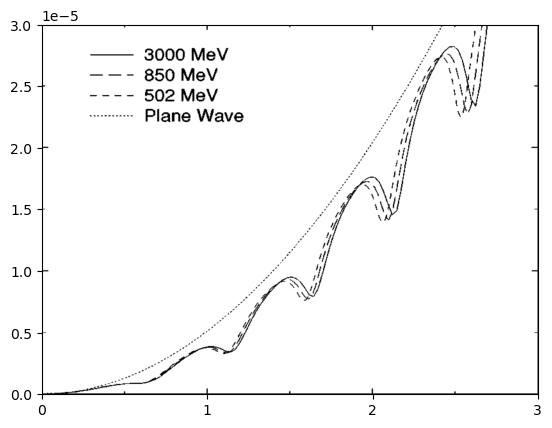

In [97]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref3.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,3,0, 3e-5],aspect='auto')
#
#plt.plot(q1_fm,A_PV_502,label='502')
#plt.plot(q2_fm,A_PV_850,label='850')
#plt.plot(q3_fm,A_PV_3000,label='3000')
#plt.plot(q3_fm,A_PV_3000_norecoil,label='3000 (no recoil)')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,3)
plt.ylim(0,3e-5)
#plt.legend()

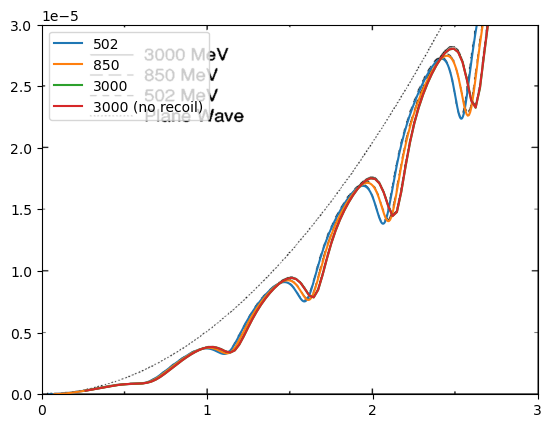

In [98]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref3.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,3,0, 3e-5],aspect='auto')
#
plt.plot(q1_fm,A_PV_502,label='502')
plt.plot(q2_fm,A_PV_850,label='850')
plt.plot(q3_fm,A_PV_3000,label='3000')
plt.plot(q3_fm,A_PV_3000_norecoil,label='3000 (no recoil)')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,3)
plt.ylim(0,3e-5)
plt.legend()

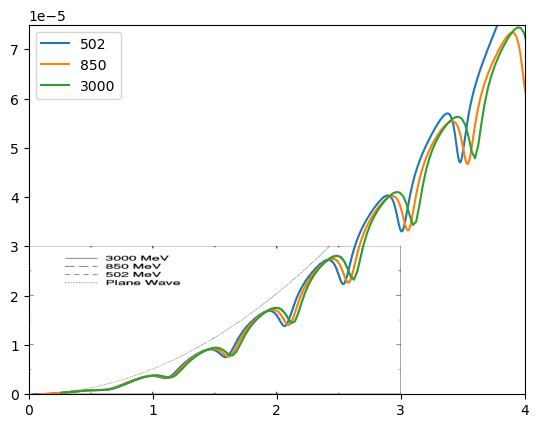

In [99]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref3.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,3,0, 3e-5],aspect='auto')
#
plt.plot(q1_fm,A_PV_502,label='502')
plt.plot(q2_fm,A_PV_850,label='850')
plt.plot(q3_fm,A_PV_3000,label='3000')
#plt.plot(q3_fm,A_PV_3000_norecoil,label='3000 (no recoil)')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,4)
plt.ylim(0,7.5e-5)
plt.legend()

# H4

### Optimise Settings

In [54]:
He3_ref_test = phr.nuclei.references.load_reference_nucleus(2,3)
He3_ref_test.weak_density = partial(weak_density_model,lam=1.00,nucleus=He3_ref_test)
He3_ref_test.update_dependencies()

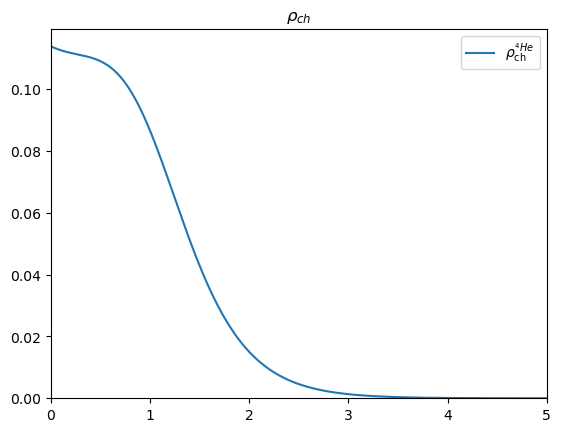

In [55]:
r=np.arange(0,5,1e-2)
plt.title(r'$\rho_{ch}$')
plt.plot(r,He4_test1.charge_density(r),label=r'$\rho^{^{4}He}_\operatorname{ch}$')
#plt.plot(r,He3_ref_test.charge_density(r),label=r'$\rho^\operatorname{ref,^{3}He}_\operatorname{ch}$')
plt.xlim(0,5)
plt.ylim(0,)
plt.legend()

In [56]:
# delta diff does not converge but only goes down to about 1e-9, a phase_difference_limit below that level will not converge

In [57]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
A_PV_ref_test = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,verbose=True,**{'method': 'DOP853', 'N_partial_waves': 50, 'atol': 1e-12, 'rtol': 1e-12, 'energy_norm': 197.3269804, 'phase_difference_limit': 0})

Calculate left crosssection ...
E= 656.2172129783868 MeV
r0= 0.0001 fm
rc= 6.4 fm
Calculate phaseshift for kappa= -1 , delta_diff=  -0.01971214953768241
Calculate phaseshift for kappa= -2 , delta_diff=  -0.009633091169598096
Calculate phaseshift for kappa= -3 , delta_diff=  -0.005011654062811566
Calculate phaseshift for kappa= -4 , delta_diff=  -0.002594374826407453
Calculate phaseshift for kappa= -5 , delta_diff=  -0.0013209244370320228
Calculate phaseshift for kappa= -6 , delta_diff=  -0.0006617592864630595
Calculate phaseshift for kappa= -7 , delta_diff=  -0.0003270946324454016
Calculate phaseshift for kappa= -8 , delta_diff=  -0.00015989274671657228
Calculate phaseshift for kappa= -9 , delta_diff=  -7.742486548512062e-05
Calculate phaseshift for kappa= -10 , delta_diff=  -3.717966615823798e-05
Calculate phaseshift for kappa= -11 , delta_diff=  -1.7718500335384135e-05
Calculate phaseshift for kappa= -12 , delta_diff=  -8.385165226165725e-06
Calculate phaseshift for kappa= -13 , delt

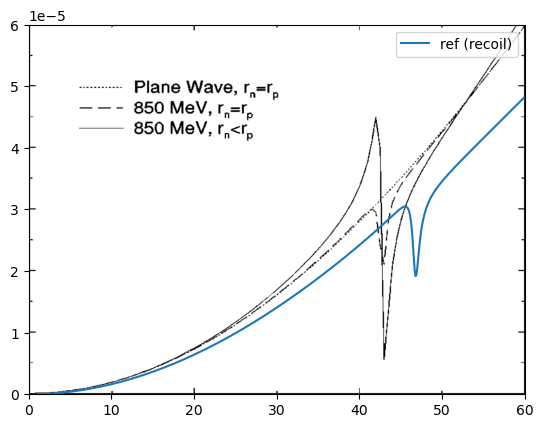

In [58]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
plt.plot(theta_deg,A_PV_ref_test,label='ref (recoil)')
#plt.plot(theta_deg,A_PV_ref_test1,label='ref 1 (no recoil)')
#plt.plot(theta_deg,A_PV_ref_test2,label='ref 2 (no recoil)')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,60)
plt.ylim(0,6e-5)
plt.legend()

In [59]:
# rerun with changed minimum phase shift difference

In [60]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
args_APV_He4=phr.dirac_solvers.post_processing.crosssection.optimise_left_right_asymmetry_precision(E_MeV,theta_deg*pi/180,He4_test1,left_right_asymmetry_precision=1e-2)

new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 12.761901617050171 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 12.784528255462646 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 11.897377967834473 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 10.285124778747559 diff: 1.1486007066823711e-08
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 9.576260089874268 diff: 3.516576532582991e-08
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol'

In [72]:
args_APV_He4={'method': 'DOP853', 'N_partial_waves': 60, 'atol': 1e-06, 'rtol': 1e-07, 'energy_norm': 1.973269804, 'phase_difference_limit': 1e-08}

In [62]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
A_PV_ref_test_opt = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,verbose=False,**args_APV_He4)

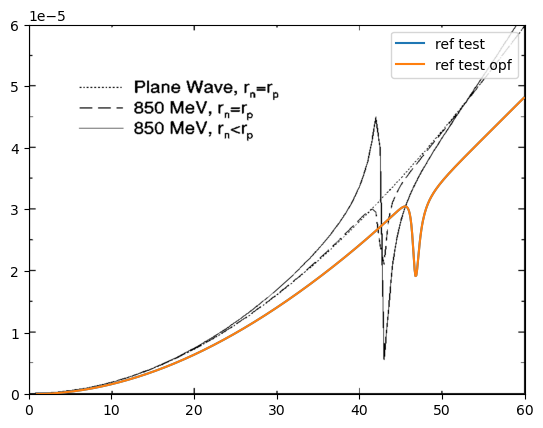

In [63]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
#
plt.plot(theta_deg,A_PV_ref_test,label='ref test')
plt.plot(theta_deg,A_PV_ref_test_opt,label='ref test opf')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,60)
plt.ylim(0,6e-5)
plt.legend()

### Compare

In [74]:
args_APV_He4={'method': 'DOP853', 'N_partial_waves': 60, 'atol': 1e-06, 'rtol': 1e-07, 'energy_norm': 1.973269804, 'phase_difference_limit': 1e-08}

In [75]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
print('Start')
A_PV0 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,recoil=True,verbose=False,**args_APV_He4)
print('APV0 done')
A_PV1 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,recoil=False,verbose=False,**args_APV_He4)
print('APV1 done')
A_PV2 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test2,recoil=False,verbose=False,**args_APV_He4)
print('APV2 done')

Start
APV0 done
APV1 done
APV2 done


(0.0, 6e-05)

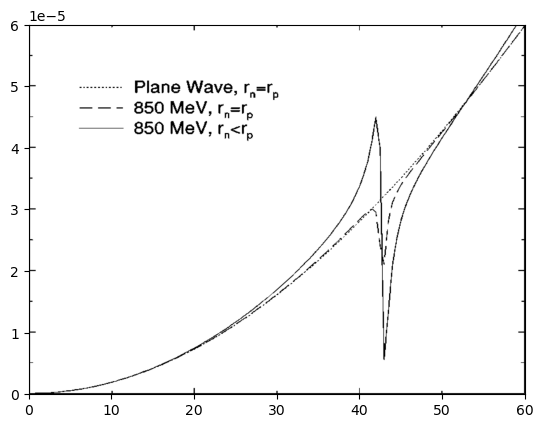

In [76]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
#
#plt.plot(theta_deg,A_PV0,label='1.00 (w/  recoil)')
#plt.plot(theta_deg,A_PV1,label='1.00 (w/o recoil)')
#plt.plot(theta_deg,A_PV2,label='0.99 (w/o recoil)')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,60)
plt.ylim(0,6e-5)
#plt.legend()

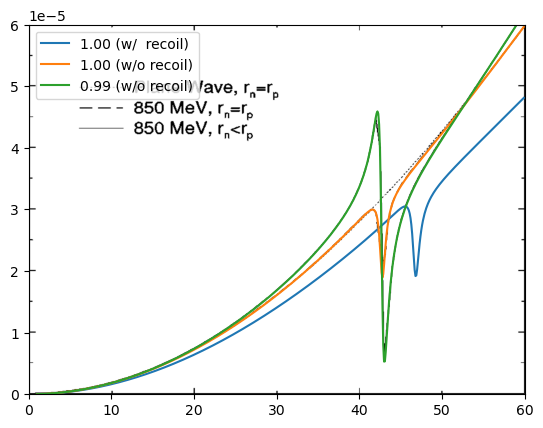

In [77]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
#
plt.plot(theta_deg,A_PV0,label='1.00 (w/  recoil)')
plt.plot(theta_deg,A_PV1,label='1.00 (w/o recoil)')
plt.plot(theta_deg,A_PV2,label='0.99 (w/o recoil)')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,60)
plt.ylim(0,6e-5)
plt.legend()

# pictures

(0.0, 4e-06)

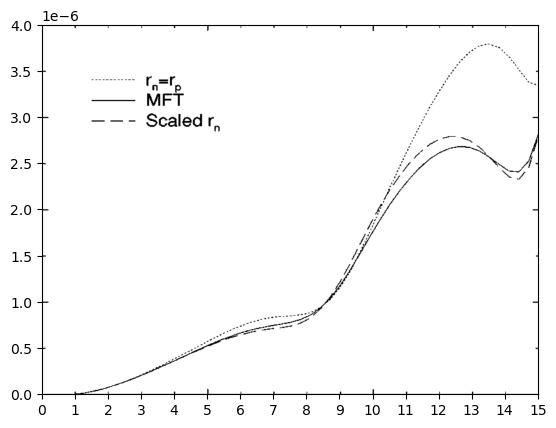

In [68]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15.04,-0.01e-6, 3.99e-6],aspect='auto')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
#plt.legend()

(0.0, 5e-05)

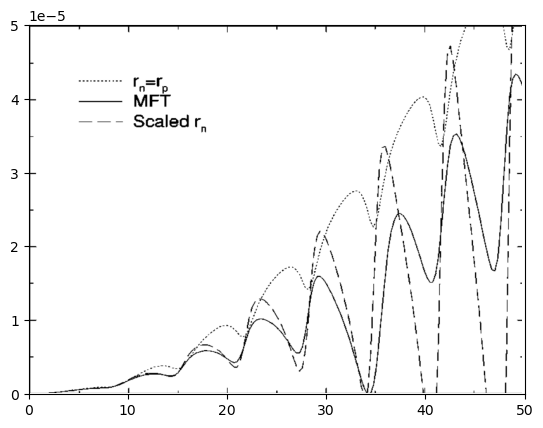

In [69]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref2.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0.1,49.6,0.02e-5, 4.98e-5],aspect='auto')
#
plt.xlim(0,50)
plt.ylim(0,5e-5)
#plt.legend()

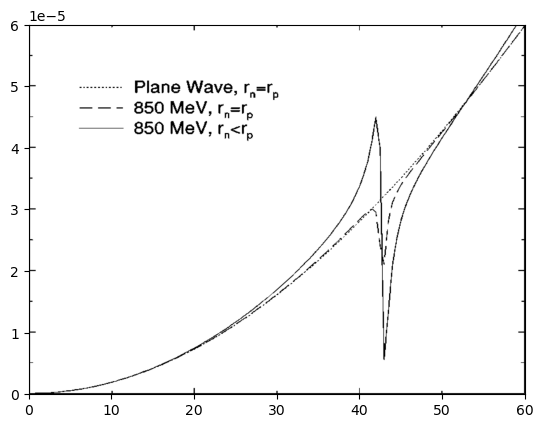

In [70]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
#

(0.0, 3e-05)

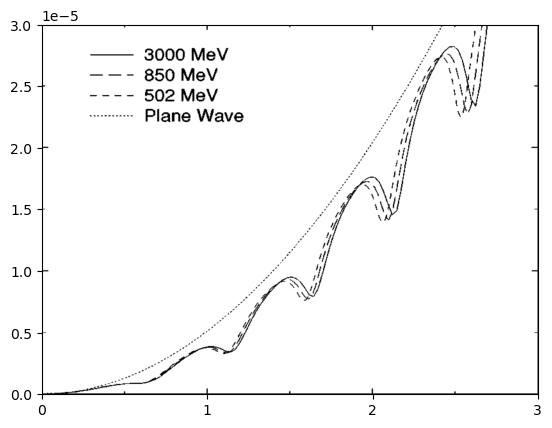

In [71]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref3.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,3,0, 3e-5],aspect='auto')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,3)
plt.ylim(0,3e-5)
#plt.legend()

# OLD Test Ti48 precision

In [43]:
args_PVES={
    'N_partial_waves' : 250,
    'atol' : 1e-13,
    'rtol' : 1e-13,
    'phase_difference_limit' : 0,
}

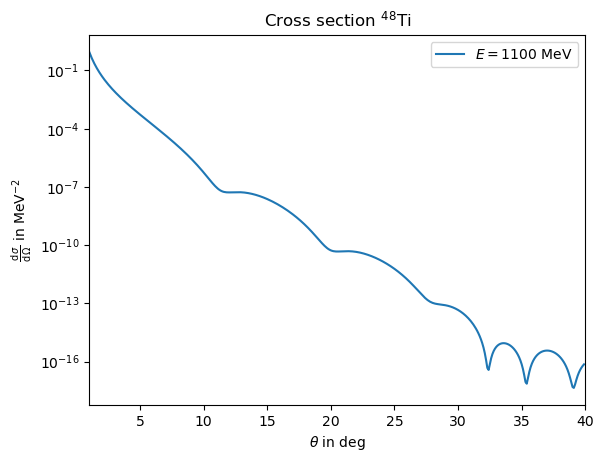

In [44]:
energy=1100
theta=np.arange(1,40,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,**args_PVES),label=r'$E=1100~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(1,40)
plt.show()

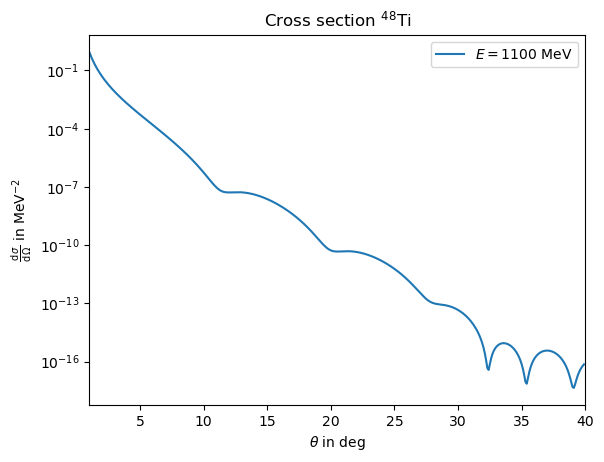

In [85]:
energy=1100
theta=np.arange(1,40,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_processes=30,**args_PVES),label=r'$E=1100~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(1,40)
plt.show()

In [86]:
## assess necessary precision # takes a long time, but enables fastest possible evaluation once these are set
# Uncomment to run again (>15min)
energy=1100
theta=np.arange(3,10,1e-1)
args_PVES_opt=phr.optimise_crosssection_precision(energy,theta*pi/180,nucleus_48Ti,crosssection_precision=1e-7,N_processes=1)

new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 38.816941022872925 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 36.886953592300415 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 35.068461179733276 diff: 3.61807533535558e-14
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 33.676604986190796 diff: 4.2445505556300895e-13
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 32.269917249679565 diff: 2.3770247528183928e-12
new best: {'method': 'DOP853', 'N_partial_

In [91]:
args_PVES_opt = {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-09, 'rtol': 1e-09, 'energy_norm': 19.732698040000002, 'phase_difference_limit': 1e-10}

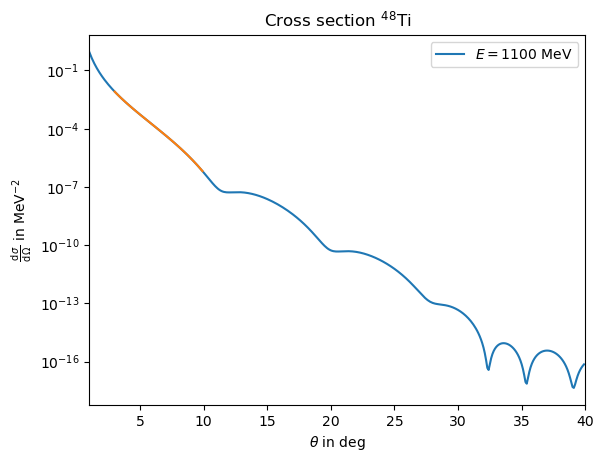

In [92]:
energy=1100
theta=np.arange(1,40,1e-1)
cross=phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,**args_PVES_opt)
plt.plot(theta,cross,label=r'$E=1100~$MeV')
plt.plot(theta[np.logical_and(3<=theta,theta<=10)],cross[np.logical_and(3<=theta,theta<=10)])
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(1,40)
plt.show()

In [29]:
args_PVES_opt_part = {'method': 'DOP853', 'atol': 1e-09, 'rtol': 1e-09, 'energy_norm': 19.732698040000002, 'phase_difference_limit': 1e-10}

In [94]:
N_par_arr = np.arange(20,250,1)
theta=np.arange(3,10,1e-2)
cross_previous = phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_partial_waves=19,**args_PVES_opt_part)
cross_diff_arr=np.array([])

for N_par in N_par_arr:
    print(N_par)
    cross_curr = phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_partial_waves=N_par,**args_PVES_opt_part)
    cross_diff_arr = np.append(cross_diff_arr,np.max(np.abs(cross_curr-cross_previous)))
    cross_previous = cross_curr
    

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


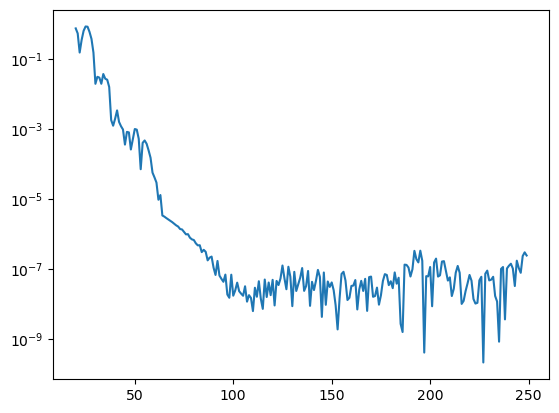

In [95]:
plt.plot(N_par_arr,cross_diff_arr)
plt.yscale('log')

In [ ]:
# for crosssection noise at level <1e-6

In [ ]:
#>100 partialwellen nicht stabil/genau

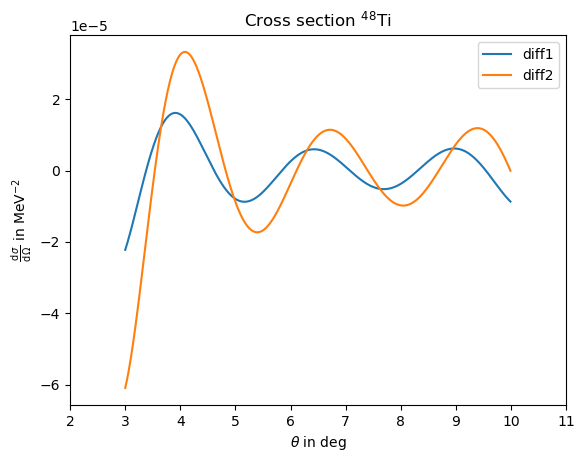

In [30]:
energy=1100
theta=np.arange(3,10,1e-2)
cross=phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_partial_waves=150,**args_PVES_opt_part)
cross2=phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_partial_waves=140,**args_PVES_opt_part)
cross3=phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,N_partial_waves=130,**args_PVES_opt_part)
plt.plot(theta,(cross-cross2)/cross,label=r'diff1')
plt.plot(theta,(cross-cross3)/cross,label=r'diff2')
#plt.plot(theta[np.logical_and(3<=theta,theta<=10)],cross[np.logical_and(3<=theta,theta<=10)])
#plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(2,11)
plt.show()

In [ ]:
# Example

In [ ]:
ai_48Ti=np.array([0.03392,0.05913,0.01547,-0.02550,-0.0152,0.0029,0.0037])
R_48Ti=9.25
nucleus_48Ti_test0 = phr.nucleus('48Ti_FB',Z=22,A=48,ai=ai_48Ti,R=R_48Ti)
weak_charge_48Ti_test=nucleus_48Ti_test0.Qw
total_charge_48Ti_test=nucleus_48Ti_test0.total_charge
nucleus_48Ti_test = phr.nucleus('48Ti_FB',Z=22,A=48,ai=ai_48Ti,R=R_48Ti,ai_weak=weak_charge_48Ti_test/total_charge_48Ti_test*ai_48Ti,R_weak=R_48Ti)

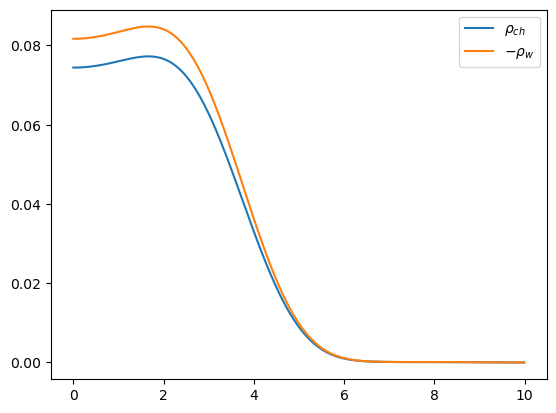

In [6]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_48Ti_test.charge_density(r),label=r'$\rho_{ch}$')
plt.plot(r,-nucleus_48Ti_test.weak_density(r),label=r'$-\rho_{w}$')
plt.xlim(0,10)
plt.ylim(0,)
plt.legend()

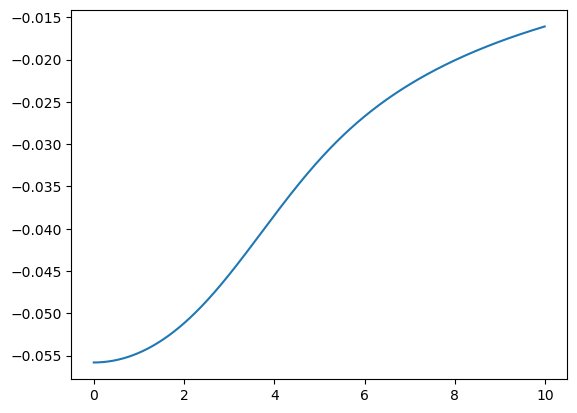

In [7]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_48Ti_test.electric_potential(r))
plt.xlim(0,10)
plt.ylim(None,0)

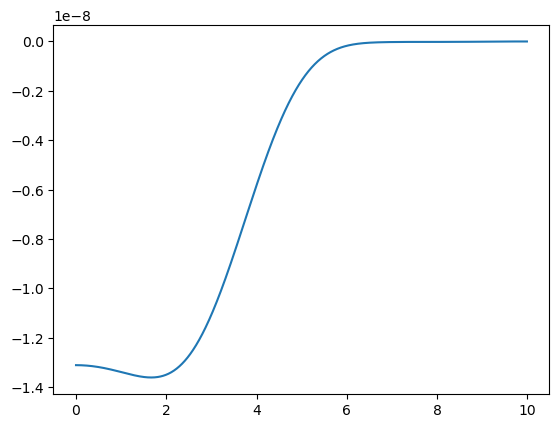

In [8]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_48Ti_test.weak_potential(r))
plt.xlim(0,10)
plt.ylim(None,0)

In [11]:
args_PVES_opt = {'method': 'DOP853', 'atol': 1e-10, 'rtol': 1e-12, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-11}

In [12]:
theta_deg=np.arange(4,10,1e-1)
E_MeV=1157
A_PV0 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=200,parallelise_LR=True,**args_PVES_opt)

In [13]:
theta_deg=np.arange(4,10,1e-1)
E_MeV=1157
A_PV0 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=200,parallelise_LR=False,**args_PVES_opt)

In [14]:
theta_deg=np.arange(4,10,1e-1)
E_MeV=1157
#
print('N=200')
A_PV0 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=200,**args_PVES_opt)
print('N=100')
A_PV1 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=100,**args_PVES_opt)
print('N=80')
A_PV2 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=80,**args_PVES_opt)
#print('N=50')
#A_PV3 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=50,**args_PVES_opt)
#print('N=25')
#A_PV4 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=25,**args_PVES_opt)
#print('N=15')
#A_PV5 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,verbose=False,N_partial_waves=15,**args_PVES_opt)
#

N=200
N=100
N=80


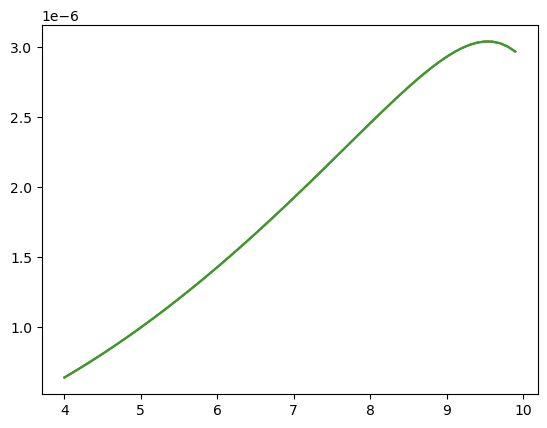

In [15]:
plt.plot(theta_deg,A_PV0)
plt.plot(theta_deg,A_PV1)
plt.plot(theta_deg,A_PV2)
#plt.plot(theta_deg,A_PV3)
#plt.plot(theta_deg,A_PV4)
#plt.plot(theta_deg,A_PV5)

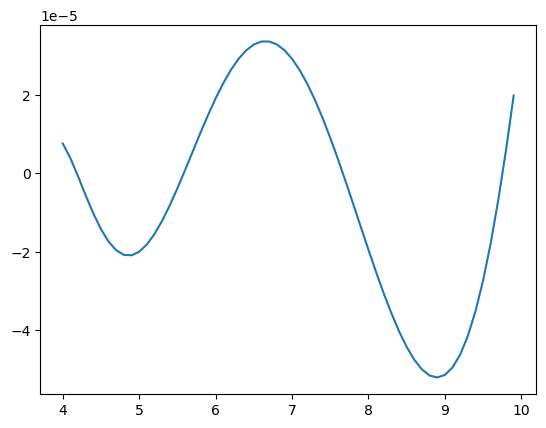

In [16]:
plt.plot(theta_deg,(A_PV2-A_PV1)/(A_PV2+A_PV1))

In [19]:
## assess necessary precision # takes a long time, but enables fastest possible evaluation once these are set
# Uncomment to run again (>1h)
theta_deg=np.arange(4,10,1e-1)
E_MeV=1157
args=phr.dirac_solvers.post_processing.crosssection.optimise_left_right_asymmetry_precision(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,left_right_asymmetry_precision=1e-2)

new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 98.35946679115295 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 97.49609851837158 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 88.85743951797485 diff: 3.6102416608719026e-10
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 86.00804710388184 diff: 5.298369030335913e-10
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-11}
time: 79.41482877731323 diff: 1.1774950892892113e-09
new best: {'method': 'DOP853', 'N_partial_wave

In [22]:
args_PVES_direct_opt = args

In [23]:
args_PVES_direct_opt = {'method': 'DOP853', 'N_partial_waves': 60, 'atol': 1e-11, 'rtol': 1e-09, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-06}

In [26]:
args_PVES_direct_opt_part = {'method': 'DOP853', 'atol': 1e-11, 'rtol': 1e-09, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-06}

In [27]:
N_par_arr = np.arange(20,200,1)
theta_deg=np.arange(4,10,1e-1)
E_MeV=1157
APV_previous = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,N_partial_waves=19,**args_PVES_direct_opt_part)
APV_diff_arr=np.array([])

for N_par in N_par_arr:
    print(N_par)
    APV_curr = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_48Ti_test,N_partial_waves=N_par,**args_PVES_direct_opt_part)
    APV_diff_arr = np.append(APV_diff_arr,np.max(np.abs(APV_curr-APV_previous)))
    APV_previous = APV_curr
    

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


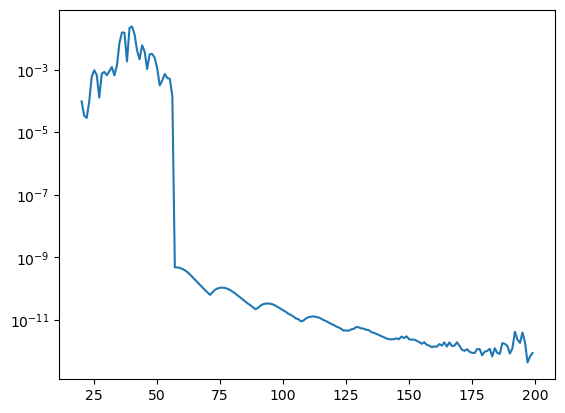

In [28]:
plt.plot(N_par_arr,APV_diff_arr)
plt.yscale('log')

In [21]:
#Pb: 
q_Pb = np.sqrt(0.00616*1e6)
theta_Pb = 4.7*pi/180 #L: 4.71(2) R: 4.67(2)
print(q_Pb)
#Ca: 
q_Ca = np.sqrt(0.0297*1e6)
theta_Ca = 4.51*pi/180
print(q_Ca)
#Al:
q_Al = np.sqrt(0.02357*1e6)
theta_Al = 7.61*pi/180
print(q_Al)

78.48566748139433
172.33687939614086
153.52524222420234


In [22]:
#Pb:
#approx
print(q_Pb/(2*np.sin(theta_Pb/2)))
#approx
#Ca: 
#approx
print(q_Ca/(2*np.sin(theta_Ca/2)))
#Al:
#approx
print(q_Al/(2*np.sin(theta_Al/2)))

957.0550135868299
2189.961300796471
1156.7434233585843


## Old example nucleus

In [23]:
# oszillator basis (shell model)
Cs_M00_Al27=np.array([27, -11.3343, 0.837814])
Cs_M01_Al27=np.array([2*13-27, 0.666696, -0.0858552])
Cs_Phipp00_Al27=np.array([-4.98975 , 0.997985])
Cs_Phipp01_Al27=np.array([0.303398 , -0.0606814])
Ci_dict_Al27={'M00':Cs_M00_Al27,'M01':Cs_M01_Al27,'Phipp00':Cs_Phipp00_Al27,'Phipp01':Cs_Phipp01_Al27}
nucleus_osz_Al27 = phr.nucleus('Al27_osz',Z=13,A=27,Ci_dict=Ci_dict_Al27)

In [24]:
# shell model is slow due to hyp1f1 implementation

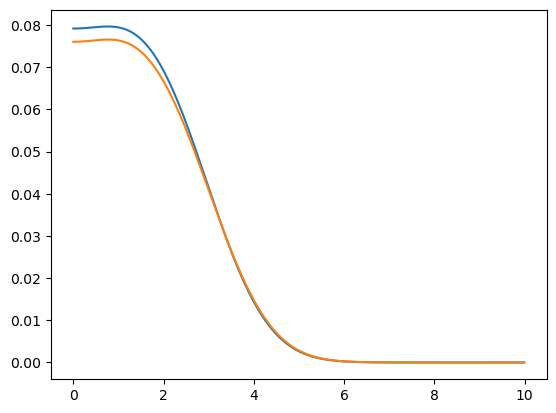

In [25]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_osz_Al27.charge_density(r))
plt.plot(r,-nucleus_osz_Al27.weak_density(r))

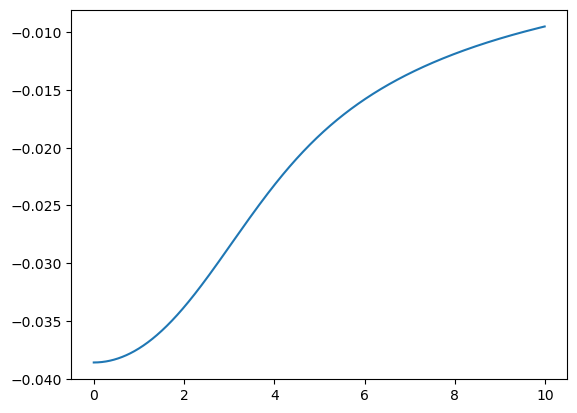

In [26]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_osz_Al27.electric_potential(r))

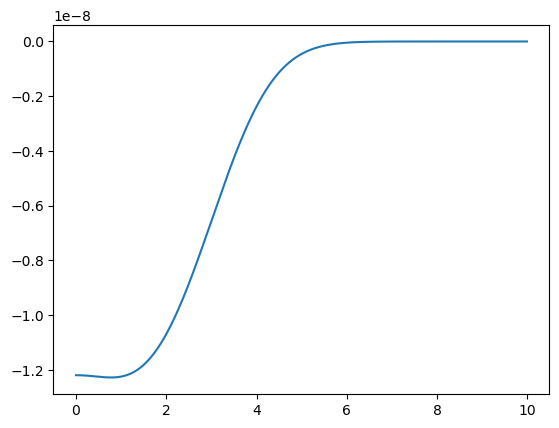

In [27]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_osz_Al27.weak_potential(r))

In [30]:
args_PVES_opt = {'method': 'DOP853', 'atol': 1e-10, 'rtol': 1e-12, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-11}

In [ ]:
A_PV1 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_osz_Al27,verbose=False,N_partial_waves=100,**args_PVES_opt)

In [ ]:
plt.plot(theta_deg,A_PV1)